In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('tips.csv')
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [3]:
df.total_bill.max()

50.81

<AxesSubplot:>

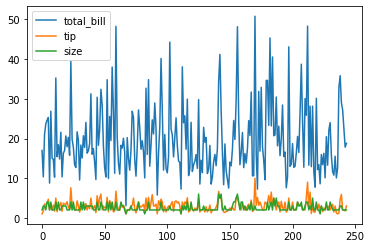

In [4]:
df.plot()

<AxesSubplot:title={'center':'Общая сумма счета'}, ylabel='Frequency'>

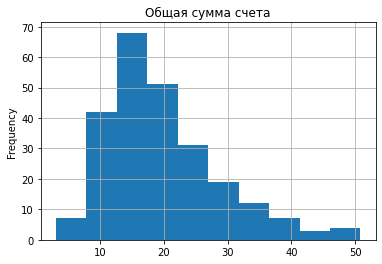

In [5]:
df.total_bill.plot(kind='hist',grid=True,title='Общая сумма счета')

<AxesSubplot:title={'center':'Количество посетителей по дням'}>

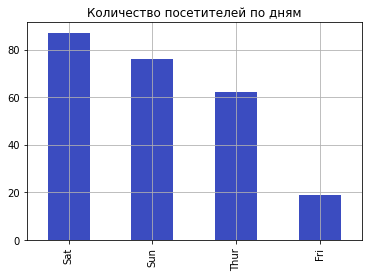

In [6]:
df.day.value_counts().plot(kind='bar',
                           grid=True,
                           colormap='coolwarm',
                           title='Количество посетителей по дням'
                          )

<AxesSubplot:xlabel='sex,smoker'>

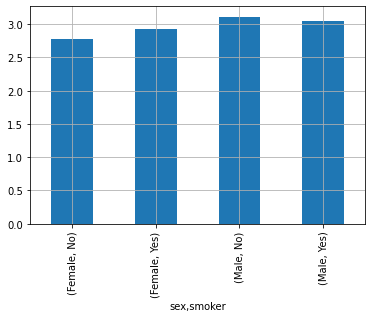

In [7]:
df.groupby(['sex','smoker']).tip.mean().plot(kind='bar', grid=True)

array([<AxesSubplot:title={'center':'Общая сумма счета'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

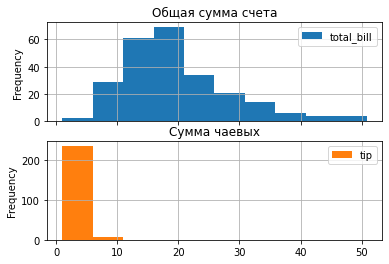

In [8]:
df[['total_bill','tip']].plot(kind='hist',
                              grid=True,
                              subplots=True,
                              title=['Общая сумма счета','Сумма чаевых'])

<AxesSubplot:title={'center':'Общая сумма счета vs Сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

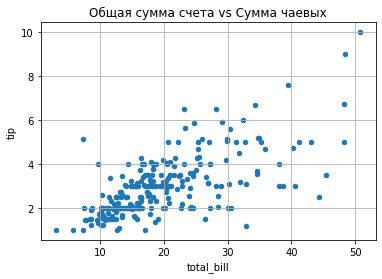

In [9]:
df.plot(kind='scatter',
        x='total_bill',
        y='tip',
        title='Общая сумма счета vs Сумма чаевых',
        grid=True
       )

<AxesSubplot:xlabel='day'>

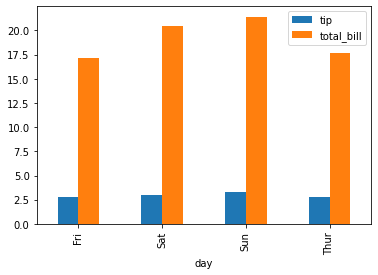

In [10]:
df.pivot_table(values=['total_bill','tip'],index='day',aggfunc='mean').plot(kind='bar')

<AxesSubplot:xlabel='sex,smoker'>

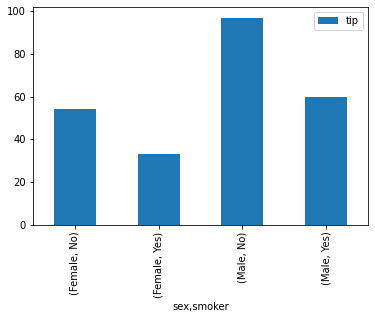

In [11]:
df.pivot_table(values='tip',index=['sex','smoker'],aggfunc='count').plot(kind='bar')

Text(0.5, 0, 'Сумма счета, USD')

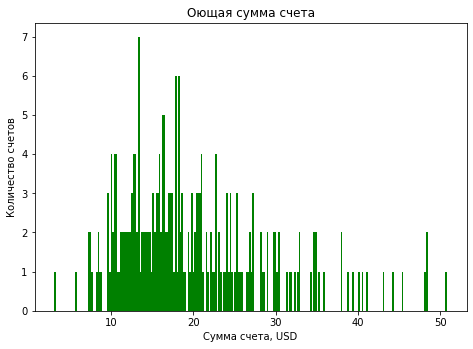

In [12]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.hist(df.total_bill,bins=len(df.total_bill),color='green')
axes.set_title('Оющая сумма счета')
axes.set_ylabel('Количество счетов')
axes.set_xlabel('Сумма счета, USD')

Text(0, 0.5, 'Сумма чаевых')

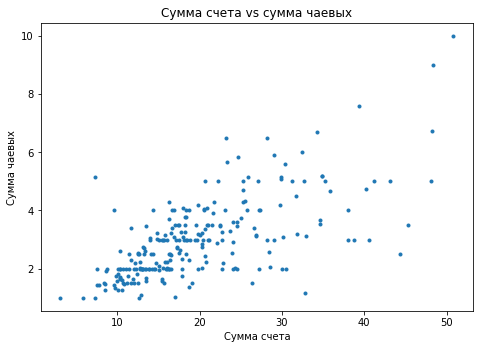

In [13]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.scatter(x=df.total_bill, y=df.tip, marker='.')
axes.set_title('Сумма счета vs сумма чаевых')
axes.set_xlabel('Сумма счета')
axes.set_ylabel('Сумма чаевых')

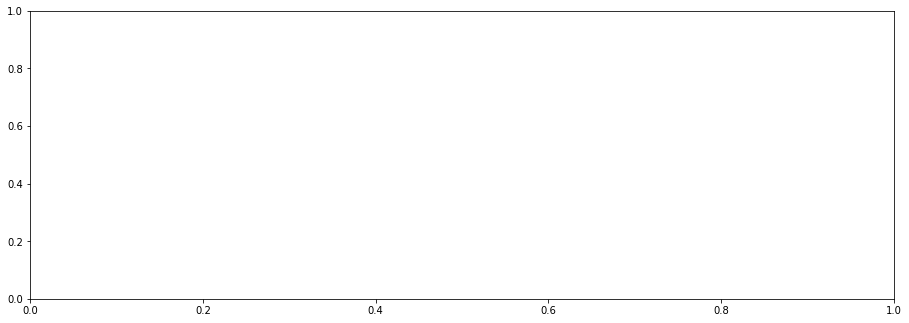

In [14]:
fig = plt.figure()
axes = fig.add_axes([0,0,2,1])

In [15]:
df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


Text(0, 0.5, 'Max и min сумма счета')

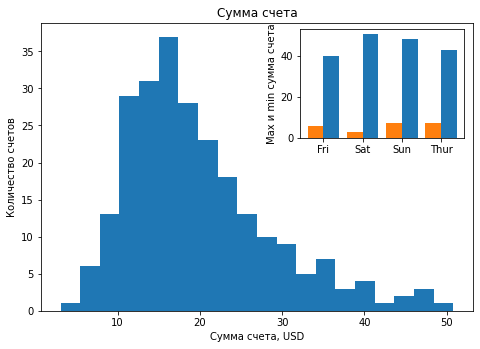

In [16]:
bills_per_day = df.groupby(by = 'day')['total_bill'].agg(['min','max']).reset_index()

fig = plt.figure()
main_axes = fig.add_axes([0,0,1,1])
main_axes.hist(df.total_bill,bins=20)
main_axes.set_title('Сумма счета')
main_axes.set_ylabel('Количество счетов')
main_axes.set_xlabel('Сумма счета, USD')

insert_axes = fig.add_axes([0.6,0.6,0.38,0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'],align='edge',width=0.4)
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'],align='edge',width=-0.4)
insert_axes.set_ylabel('Max и min сумма счета')

(0.0, 60.0)

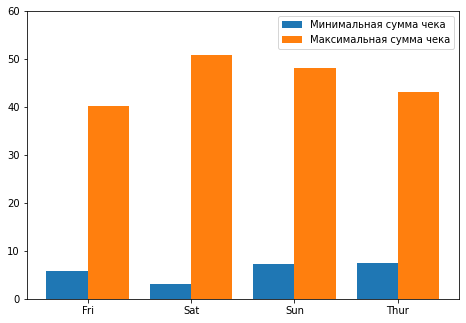

In [17]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(x = bills_per_day.day,
         height = bills_per_day['min'],
         width = -0.4,
         align='edge',
         label='Минимальная сумма чека')
axes.bar(x = bills_per_day.day,
         height = bills_per_day['max'],
         width = 0.4,
         align='edge',
         label='Максимальная сумма чека')
axes.legend(loc=0)
axes.set_ylim(0,60)

Text(0.5, 1.0, 'Сумма счета vs сумма чаевых')

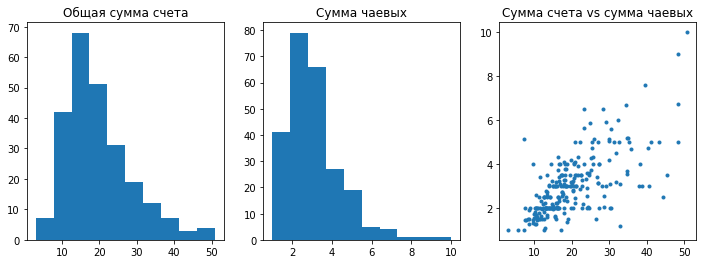

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df.total_bill)
axes[0].set_title('Общая сумма счета')

axes[1].hist(df.tip)
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x=df.total_bill, y=df.tip, marker='.')
axes[2].set_title('Сумма счета vs сумма чаевых')

In [19]:
x = np.linspace(start=-3, stop=3, num=1000)
y1=np.exp(x)
y2 = 10 + 0.4*x - 0.3*x**2 + 0.2*x**3

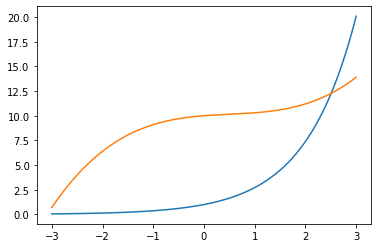

In [20]:
plt.plot(x,y1)
plt.plot(x,y2)

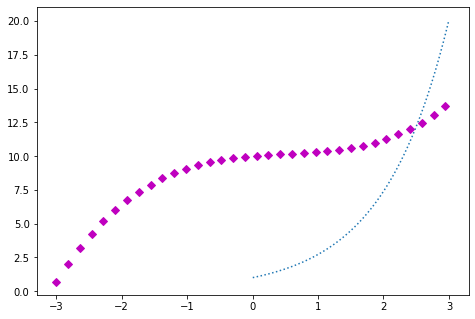

In [21]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:],y1[500:], linestyle=':')
axes.plot(x[::30],y2[::30],'mD')

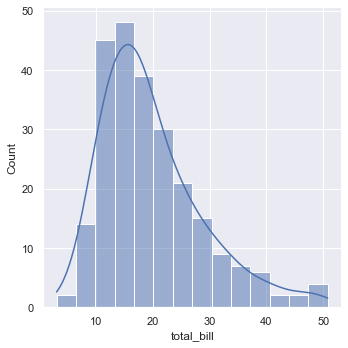

In [22]:
sns.set()
sns.displot(df.total_bill, kde=True)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

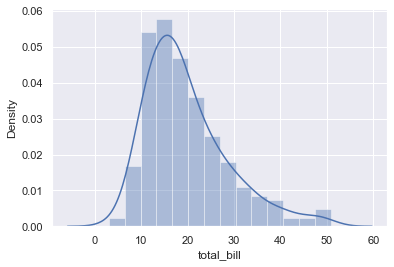

In [23]:
sns.distplot(df.total_bill)

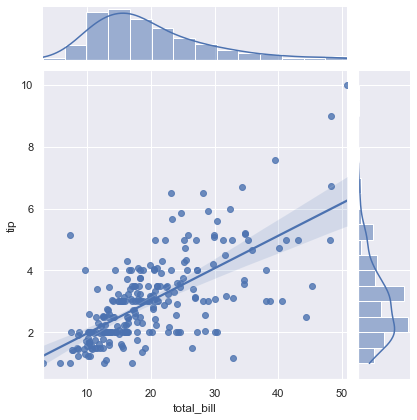

In [24]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')

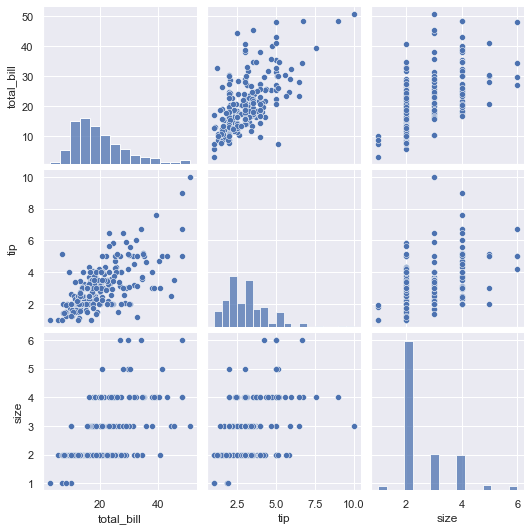

In [25]:
sns.pairplot(df)

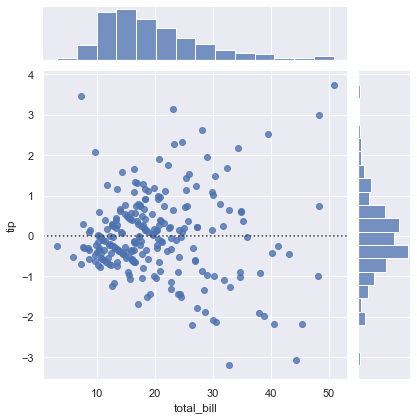

In [26]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='resid')

<AxesSubplot:xlabel='day', ylabel='count'>

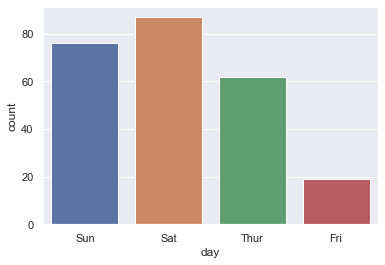

In [27]:
sns.countplot(x='day',data=df)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

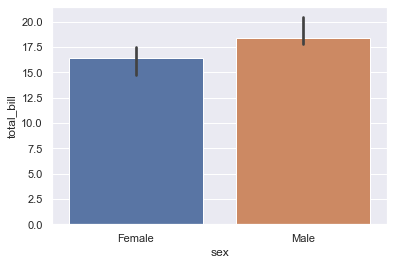

In [28]:
sns.barplot(x='sex', y='total_bill', data=df, estimator=np.median)

<AxesSubplot:xlabel='day', ylabel='tip'>

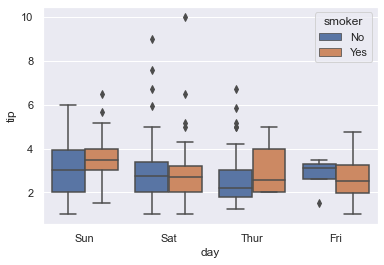

In [29]:
sns.boxplot(x='day', y='tip', data=df, hue='smoker')

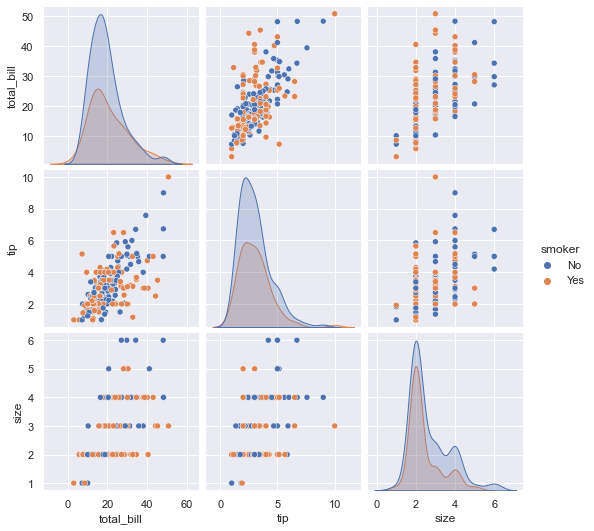

In [30]:
sns.pairplot(data=df,hue='smoker')

<AxesSubplot:>

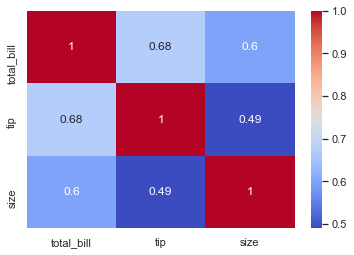

In [31]:
correlation = df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [32]:
!pip install plotly

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [33]:
!pip install cufflinks

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [34]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

init_notebook_mode(connected = True)
cf.go_offline()

In [35]:
df.iplot()

In [36]:
df[['total_bill', 'tip']].iplot(kind='spread')

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [37]:
df.iplot(kind='bubble', x='total_bill', y='size', size='tip')

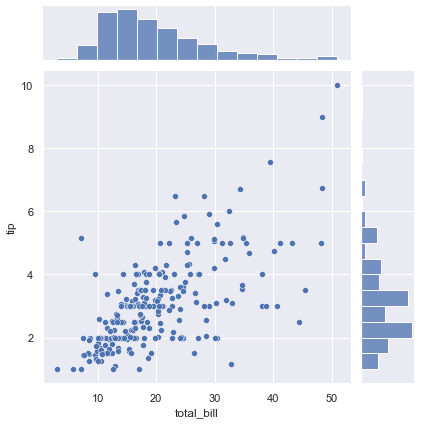

In [38]:
sns.jointplot(x='total_bill', y='tip', data=df)

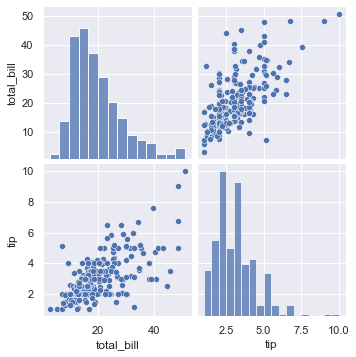

In [39]:
sns.pairplot(df[['total_bill','tip']])

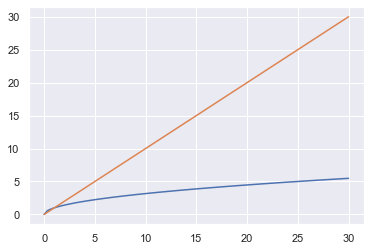

In [46]:
y=lambda x: x**(0.5)
fig=plt.subplots()
x=np.linspace(0,30,100)
plt.plot(x,y(x))
plt.plot(x,x)
plt.show()